# Exemple avec SimFin

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from importlib import reload 
import sys 
sys.path.append('/users/loulou/cedia/simfin/Model')
import warnings
import simfin
import pandas as pd
import os
import plotly.graph_objects as go
from plotly.subplots import make_subplots
warnings.filterwarnings('ignore')
module_dir = '../'
simfin = reload(simfin)

In [5]:
family_credits = pd.DataFrame(pd.read_pickle(module_dir+'/simfin/params/credit_famille.pkl'))
family_credits

credit_famille
age educ insch male  nkids married                
18  dec  False False 0     False      1.148353e-16
                           True       2.361296e-17
                     1     False      1.576669e-01
                           True       5.894932e-02
                     2     False      2.403928e-01
...                                            ...
110 uni  False True  5     True       8.343630e-03
                     6     False     -9.217126e-17
                           True       8.343630e-03
                     7     False     -9.217126e-17
                           True       8.343630e-03

[14208 rows x 1 columns]

In [37]:
tcam = pd.read_pickle(module_dir+'simfin/params/health_cihi_growth.pkl')
tcam =tcam.groupby('age').mean()
tcam = tcam.loc[tcam.index<=90]

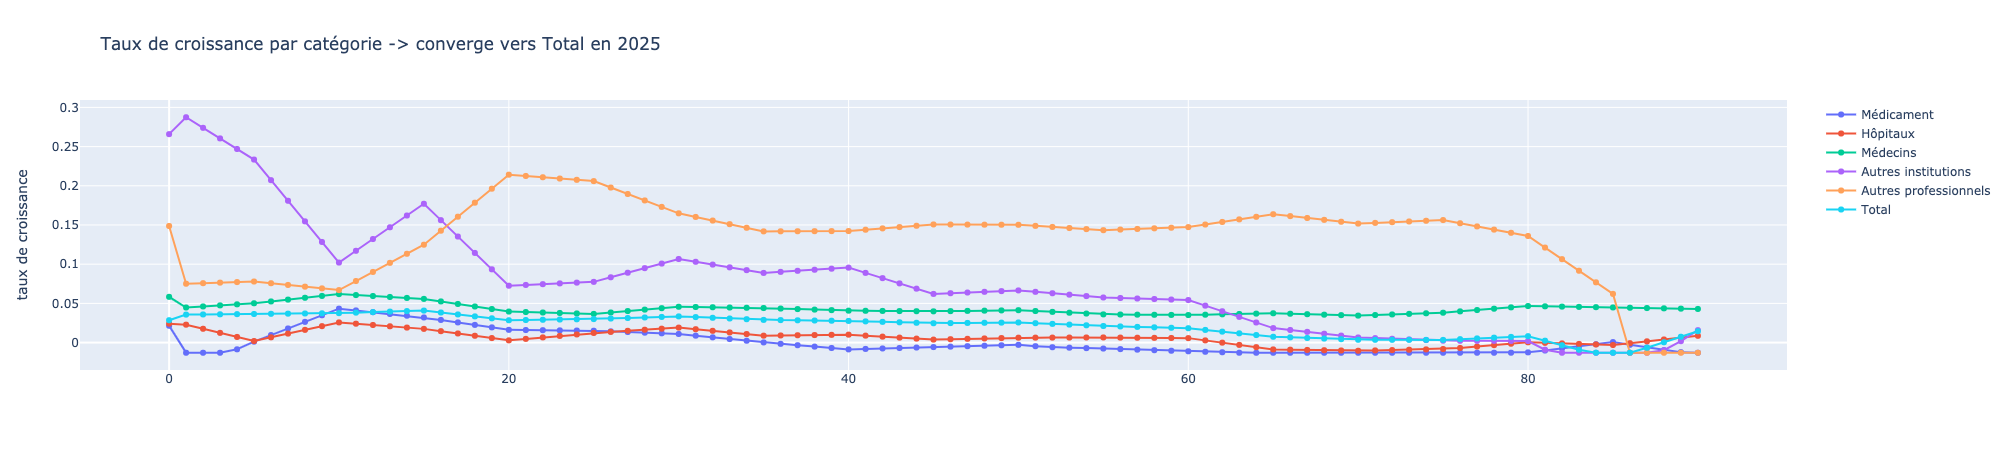

In [38]:
#mode='lines'
tcam_fig = make_subplots()
tcam_fig.add_trace(go.Scatter(x=tcam.index, y=tcam.loc[:,'Drugs'],
                    mode='lines+markers',
                    name='Médicament'))
tcam_fig.add_trace(go.Scatter(x=tcam.index, y=tcam.loc[:,'Hospitals'],
                    mode='lines+markers',
                    name='Hôpitaux'))
tcam_fig.add_trace(go.Scatter(x=tcam.index, y=tcam.loc[:,'Physicians'],
                    mode='lines+markers',
                    name='Médecins'))
tcam_fig.add_trace(go.Scatter(x=tcam.index, y=tcam.loc[:,'Other Institutions'],
                    mode='lines+markers',
                    name='Autres institutions'))
tcam_fig.add_trace(go.Scatter(x=tcam.index, y=tcam.loc[:,'Other Professionals'],
                    mode='lines+markers',
                    name='Autres professionnels'))

tcam_fig.add_trace(go.Scatter(x=tcam.index, y=tcam.loc[:,'Total'],
                    mode='lines+markers',
                    name='Total'))

tcam_fig.update_layout(
    title_text="Taux de croissance par catégorie -> converge vers Total en 2025"
)
tcam_fig.update_yaxes(title_text="taux de croissance")


In [3]:
x = simfin.simulator(2019,2041)


non_work/earnings : 0.23453392421818633
alignment factor for consommation :  1.7354308028832097
alignment factor for consommation tax :  0.6674868014370197
alignment factor for personal tax :  0.5724825037590938
alignment factor for health :  1.2477680010889918
alignment factor for education :  1.3109346302077027


In [12]:
pop_2017 = x.pop[2017]
pop_2017.loc[0:4]

age  male   insch  educ  married  nkids  chsld
0    False  False  none  False    0      False    41136.960108
     True   False  none  False    0      False    43243.726267
1    False  False  dec   False    0      False        0.000000
                                         True         0.000000
                                  1      False        0.000000
                                                      ...     
4    True   True   uni   True     3      True         0.000000
                                  4      False        0.000000
                                         True         0.000000
                                  5      False        0.000000
                                         True         0.000000
Name: 2017, Length: 1538, dtype: float64

In [4]:
%%time
x.simulate()

CPU times: user 12.4 s, sys: 602 ms, total: 13 s
Wall time: 12.9 s


In [5]:
x.summary

,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
personal,31773,32577.9,33416.5,34229.7,35063,35923.8,36790.1,37683.3,38566.8,39437.8,...,42212.9,43219.6,44204.9,45213.4,46242.3,47335.4,48459,49589.6,50689.1,51798.7
corporate,9183,9394.71,9606.05,9817.19,10037,10262.9,10495,10726.2,10970.6,11224.4,...,12058.8,12370.2,12684.2,13008.3,13337.7,13675.6,14032.7,14392.2,14748.3,15110.8
consumption,21001,21506.4,22032.3,22546.9,23093.8,23650.1,24218.8,24841.4,25424.6,26004,...,27801.5,28429.4,29054.8,29672.4,30312.9,30998.9,31682.6,32373.5,33053.9,33748.1
other taxes,29669,30353,31035.8,31718,32428.1,33157.9,33907.9,34654.8,35444.5,36264.6,...,38960.3,39966.3,40980.8,42028,43092.2,44183.9,45337.8,46499.3,47649.7,48821.1
autonomous,91626,93831.9,96090.7,98311.7,100622,102995,105412,107906,110406,112931,...,121033,123985,126925,129922,132985,136194,139512,142855,146141,149479
federal transfers,23120,23653,24185.1,24716.7,25270.1,25838.7,26423.2,27005.2,27620.6,28259.7,...,30360.4,31144.3,31934.9,32751,33580.2,34431,35330.1,36235.3,37131.7,38044.5
total revenue,114746,117485,120276,123028,125892,128833,131835,134911,138027,141191,...,151394,155130,158860,162673,166565,170625,174842,179090,183273,187523
mission health,41522,43355.1,45451.6,47498.9,49673.4,52046.9,54601,57160.1,59605.2,62068.1,...,69937.4,72901.3,75885,78892.4,81849.7,85082.1,88156.8,91288.1,94247.7,97495
mission education,23887,24837.2,25805.2,26805.7,27987.6,29231.7,30547.4,31823.7,33173.3,34627,...,38862.2,40389.8,42102.3,43782,45527.9,47311.2,49012.4,50768.3,52573.9,54518.5
other missions,32335,33080.5,33824.6,34568.1,35342,36137.4,36954.8,37768.8,38629.5,39523.3,...,42461.2,43557.6,44663.3,45804.6,46964.4,48154.2,49411.7,50677.7,51931.4,53208


In [6]:
#x.summary['tcam10'] = (x.summary[2030]/x.summary[2020])**(1/10)-1.0

In [7]:
y = simfin.simulator(2019,2041)

non_work/earnings : 0.23416691157190983
alignment factor for consommation :  1.7350016645647124
alignment factor for consommation tax :  0.6672986534110941
alignment factor for personal tax :  0.5717638707688916
alignment factor for health :  1.2443114588152808
alignment factor for education :  1.315197614762375


In [8]:
y.genfund.strategy.loc[:] = 0.0

In [9]:
y.simulate()

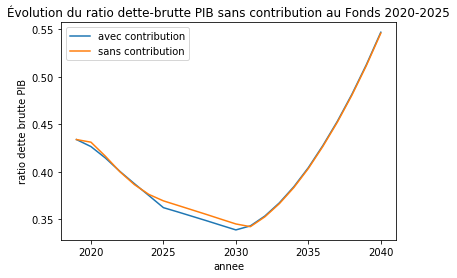

In [15]:
plt.figure()
plt.plot(x.summary.columns,x.summary.loc['debt-to-gdp',:],label='avec contribution')
plt.plot(y.summary.columns,y.summary.loc['debt-to-gdp',:],label='sans contribution')
plt.xlabel('annee')
plt.ylabel('ratio dette brutte PIB')
plt.title('Évolution du ratio dette-brutte PIB sans contribution au Fonds 2020-2025')
plt.legend()
plt.tight_layout()
plt.savefig('de')
plt.show()

In [21]:
pd.concat([x.summary.loc['surplus':,[2019,2020,2021]],y.summary.loc['surplus':,[2019,2020,2021]]],axis=1)

,2019,2020,2021,2019,2020,2021
surplus,8280,7789.48,6718.89,8280,7789.48,6718.89
generation fund,8293,15489.2,18359.5,8293,13315.2,13833.8
fund contribution,3477,2673.2,2870.32,3477,499.198,518.642
net surplus,4803,5116.28,3848.57,4803,7290.28,6200.25
reserve,NaN,12290.3,16138.8,NaN,14464.3,17033.5
debt,195188,203217,204513,195188,203217,200882
gross debt,199098,200212,198918,199098,202386,199813
gdp,458733,469309,479866,458733,469309,479866
debt-to-gdp,0.434017,0.42661,0.414529,0.434017,0.431242,0.416393
gdp growth,0.0357579,0.0230541,0.0224963,0.0357579,0.0230541,0.0224963
